In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [ ]:
gsheet = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRgo_3tQRel8wYghfzNfctGp2M3iruCjBKRbimsA2DXPfFTX3bdLfjztyjhNYq1RdswYvOAUE8Ki9sp/pub?output=csv" #importo el archivo desde la web
df = pd.read_csv(gsheet,decimal='.') #funcion de pandas para leer csv
x = df['Distancia (mm)'].to_numpy()/1000 #defino las listas de valores y las convierto en array
t = df['delta t (us)'].to_numpy()/(10**6)
def lineal(x, v, b):
  y = v*x+b
  return y


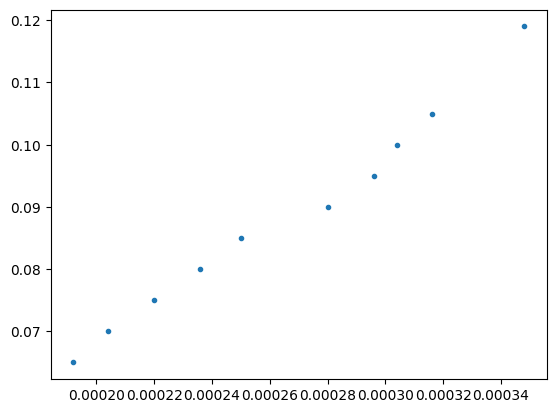

In [ ]:
plt.plot(t,x,'.') #pongo x en funcion de t porque v*t=x asi no tengo terminos diviendo

(None, <matplotlib.legend.Legend at 0x78d0bf71bd00>)

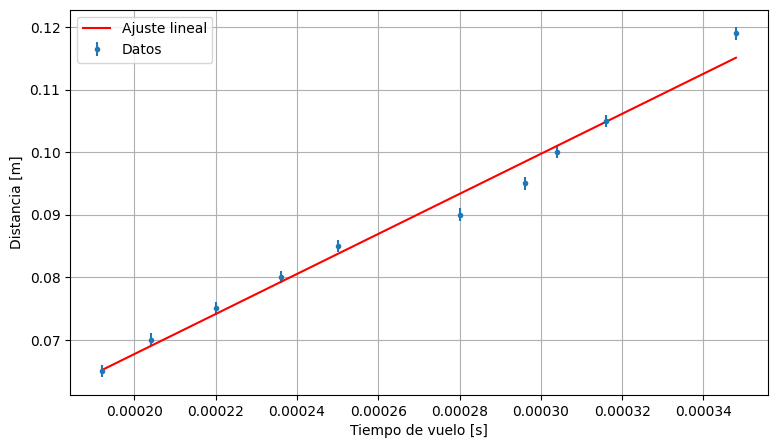

In [ ]:
params, cov = curve_fit(lineal, t, x) #funcion para calcular los parámetros a partir de un ajuste
err = np.sqrt(np.diag(cov)) #funcion parte del curve para calcular errores
y_fit = lineal(t, params[0], params[1]) #lista de datos ajustados obtenidos por el curve fit
plt.figure(figsize=(9,5))
plt.errorbar(t, x, yerr=0.001, fmt=".", label="Datos")
plt.plot(t, y_fit, "-", color="red", label = "Ajuste lineal")
plt.xlabel("Tiempo de vuelo [s]"), plt.ylabel("Distancia [m]")
plt.grid(), plt.legend()

In [ ]:
print(f'La velocidad del sonido es: {params[0]:.2f} m/s ± {err[0]:.2f} m/s')


La velocidad del sonido es: 320.33 m/s ± 14.91 m/s


(None, <matplotlib.legend.Legend at 0x78d0bb4e2320>)

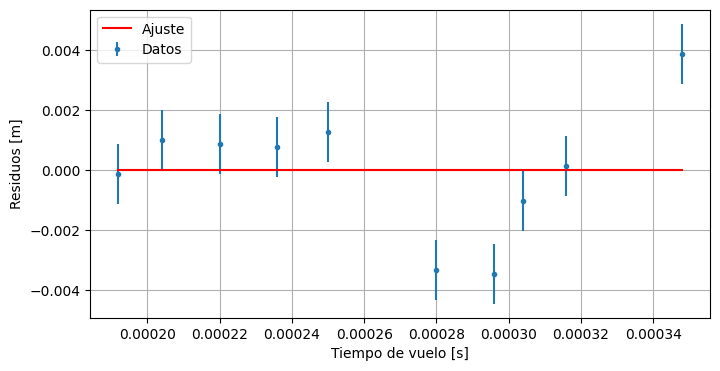

In [ ]:
plt.figure(figsize=(8,4))
plt.errorbar(t, (x - y_fit), yerr=0.001, fmt=".", label="Datos")
plt.plot(t, y_fit*0, "-", color="red", label = "Ajuste")
plt.xlabel("Tiempo de vuelo [s]"), plt.ylabel("Residuos [m]")
plt.grid(), plt.legend()